In [1]:
import pandas as pd

df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


C:\Users\yenye\AppData\Local\Temp\ipykernel_6060\300077480.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


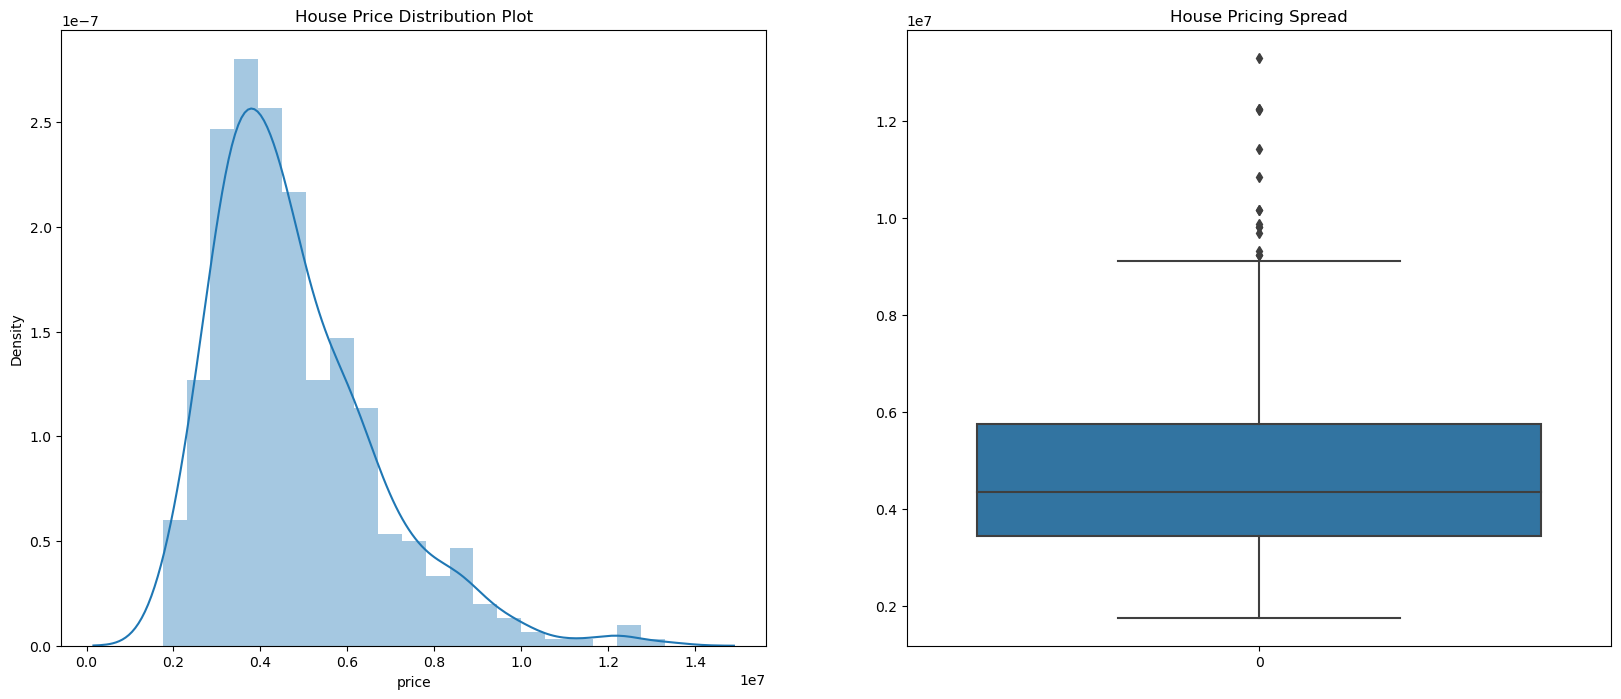

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
sns.boxplot(df.price)
plt.title('House Pricing Spread')

plt.show()

In [3]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


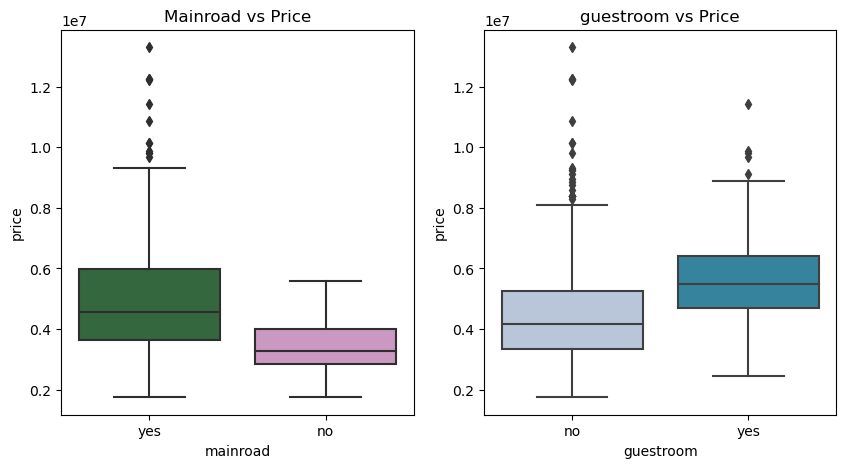

In [4]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('Mainroad vs Price')
sns.boxplot(x=df.mainroad, y=df.price, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('guestroom vs Price')
sns.boxplot(x=df.guestroom, y=df.price, palette=("PuBuGn"))

plt.show()

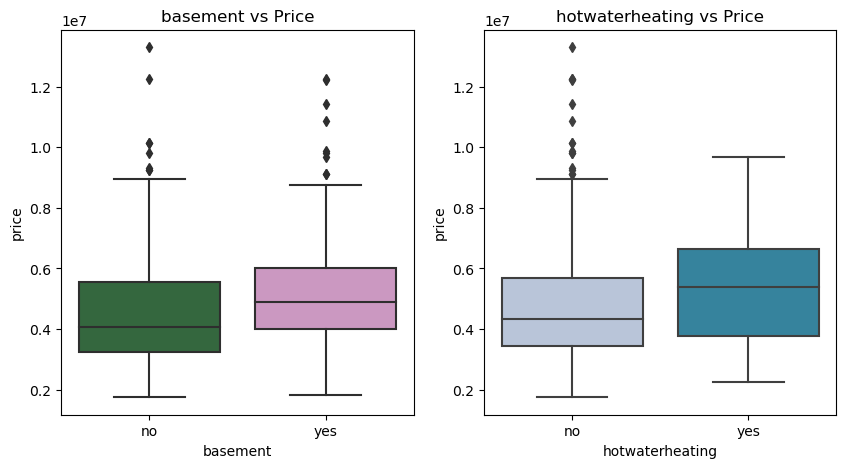

In [5]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title('basement vs Price')
sns.boxplot(x=df.basement, y=df.price, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('hotwaterheating vs Price')
sns.boxplot(x=df.hotwaterheating, y=df.price, palette=("PuBuGn"))

plt.show()

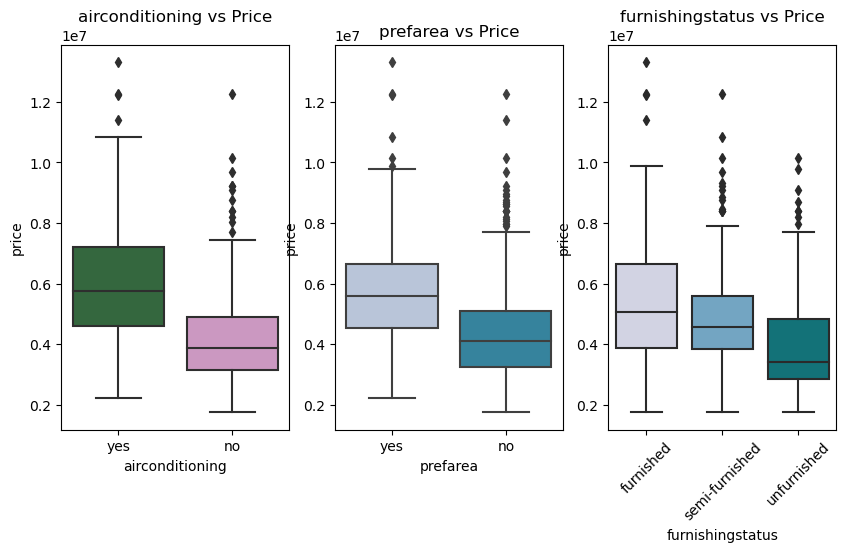

In [6]:
plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.title('airconditioning vs Price')
sns.boxplot(x=df.airconditioning, y=df.price, palette=("cubehelix"))

plt.subplot(1,3,2)
plt.title('prefarea vs Price')
sns.boxplot(x=df.prefarea, y=df.price, palette=("PuBuGn"))

plt.subplot(1,3,3)
plt.title('furnishingstatus vs Price')
sns.boxplot(x=df.furnishingstatus, y=df.price, palette=("PuBuGn"))
plt.xticks(rotation=45)

plt.show()

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


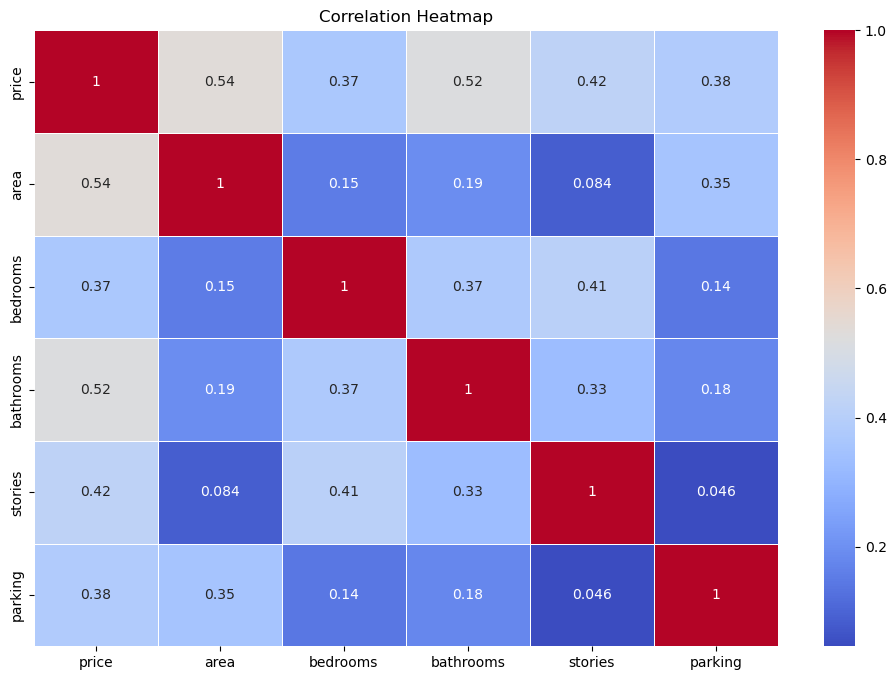

In [7]:
numerical_list = [x for x in df.columns if df[x].dtype in ('int64','float64')]
print(numerical_list)

cor_matrix= df[numerical_list].corr()
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
df = df.drop('basement', axis=1)


In [9]:
# Encode categorical columns in the training set
df = pd.get_dummies(df, columns=["mainroad", "guestroom", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"])
df

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2,0,1,1,0,1,0,1,0,1,0,0,0,1
541,1767150,2400,3,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0
542,1750000,3620,2,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1
543,1750000,2910,3,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0


In [10]:
X = df.drop('price', axis = 1).to_numpy()
y = df['price'].to_numpy()

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gbr = GradientBoostingRegressor(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],              # Number of trees in the ensemble
    'learning_rate': [0.05, 0.04],              # Learning rate
    'max_depth': [4, 5, 6],                       # Maximum depth of trees
    'min_samples_leaf': [20, 30],              # Minimum samples per leaf
    'max_features': [0.05, 0.1, 0.04],                # Fraction of features to consider
    'loss': ['huber'],                   # Loss function to use ('huber' or 'least squares')
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, 
                           cv=8, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=-1)

# Fit grid search to find the best model 
grid_search.fit(X_train, y_train)

# Get the best parameters from grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model found by GridSearchCV
best_gbr = grid_search.best_estimator_

# Predicting on the test set
y_pred = best_gbr.predict(X_test)
X_pred = best_gbr.predict(X_train)

# Calculate Mean Squared Error
gbr_MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", gbr_MSE)

# Calculate Mean Absolute Error
gbr_MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", gbr_MAE)

train_MAE = mean_absolute_error(y_train, X_pred)
print("MAE training: ", train_MAE )

# Calculate R-squared score
gbr_r2 = r2_score(y_test, y_pred)
print("R-squared score:", gbr_r2)


Fitting 8 folds for each of 108 candidates, totalling 864 fits
Best Parameters: {'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 4, 'max_features': 0.05, 'min_samples_leaf': 20, 'n_estimators': 300}
Mean Squared Error: 1535568105748.6985
Mean Absolute Error: 881649.982947563
MAE training:  642019.8117800279
R-squared score: 0.6434211314862608


In [15]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LR_y_pred = LR_model.predict(X_test)

LR_MSE = mean_squared_error(y_test, LR_y_pred)
print("Linear Regression")
print(LR_MSE)

LR_MAE = mean_absolute_error(y_test, LR_y_pred)
print("Mean Absolute Error:", LR_MAE)


LR_r2 = r2_score(y_test, LR_y_pred)
print("R-squared score:", LR_r2)

Linear Regression
1496076282504.1753
Mean Absolute Error: 891770.4824177428
R-squared score: 0.6525916460309158


In [16]:
from sklearn.tree import DecisionTreeRegressor

dt_reg =DecisionTreeRegressor(random_state= 42)

dt_reg.fit(X_train, y_train)

dt_y_pred = dt_reg.predict(X_test)
dt_MSE = mean_squared_error(y_test, dt_y_pred)
print(dt_MSE)

dt_MAE = mean_absolute_error(y_test, dt_y_pred)
print("Decision Tree")
print("Mean Absolute Error:", dt_MAE)

# Calculate R-squared score
dt_r2 = r2_score(y_test, dt_y_pred)
print("R-squared score:", dt_r2)

3322787585203.049
Decision Tree
Mean Absolute Error: 1249242.6219512196
R-squared score: 0.22840554384560408


In [17]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=100)

RF_model.fit(X_train, y_train)

RF_y_pred = RF_model.predict(X_test)
RF_MSE = mean_squared_error(y_test, RF_y_pred)
print("Random Forest")
print(RF_MSE)

# Calculate Mean Absolute Error
RF_MAE = mean_absolute_error(y_test, RF_y_pred)
print("Mean Absolute Error:", gbr_MAE)

# Calculate R-squared score
RF_r2 = r2_score(y_test, RF_y_pred)
print("R-squared score:", RF_r2)

Random Forest
1860574288251.506
Mean Absolute Error: 881649.982947563
R-squared score: 0.5679504725275581


In [18]:
from sklearn.neighbors import KNeighborsRegressor
KN_model = KNeighborsRegressor(n_neighbors=5)

KN_model.fit(X_train, y_train)

KN_y_pred = KN_model.predict(X_test)
KN_MSE = mean_squared_error(y_test, KN_y_pred)
print("K Nearest Neighbors")
print(KN_MSE)

KN_MAE = mean_absolute_error(y_test, KN_y_pred)
print("Mean Absolute Error:", gbr_MAE)

KN_r2 = r2_score(y_test, KN_y_pred)
print("R-squared score:", KN_r2)

K Nearest Neighbors
2958615727306.3657
Mean Absolute Error: 881649.982947563
R-squared score: 0.31297098157982384


In [19]:
import joblib
# Save the trained model using joblib
joblib.dump(best_gbr, 'Gradient_Boosting_Regressor.pkl')

['Gradient_Boosting_Regressor.pkl']